In [448]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image

In [449]:
df=pd.read_csv('train.csv')

In [450]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [451]:
df.shape

(891, 12)

## Data Pre-Processing

Checking for null value, treating the null values

In [452]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [453]:
df['Survived'].isnull().sum()

0

In [454]:
df['Age'].isnull().sum() #checking null value in age 

177

We have 177 null values so replacing them with mean 

In [455]:
df['Age'].mean() 

29.69911764705882

In [456]:
df["Age"].fillna(29, inplace = True) #replacing null with mean

In [457]:
df['Age'].isnull().sum() #checking null value in age

0

In [458]:
df['Fare'].isnull().sum() #checking null value in fare

0

In [459]:
df['Cabin'].isnull().sum() #checking null value in cabin

687

In [460]:
df['Pclass'].isnull().sum() #checking null value in Pclass

0

In [461]:
df['Sex'].isnull().sum() #checking null value in sex

0

In [462]:
df['Embarked'].isnull().sum() #checking null value in sibsp

2

In [463]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [464]:
df["Embarked"].fillna('S', inplace = True) #replacing null with S 

In [465]:
df['Embarked'].isnull().sum()

0

In [466]:
df['SibSp'].isnull().sum() #checking null value in sibsp

0

### Data Exploration 

In [467]:
df_survived = df[df['Survived']==1] 

In [468]:
gender=df_survived['Sex'].value_counts()

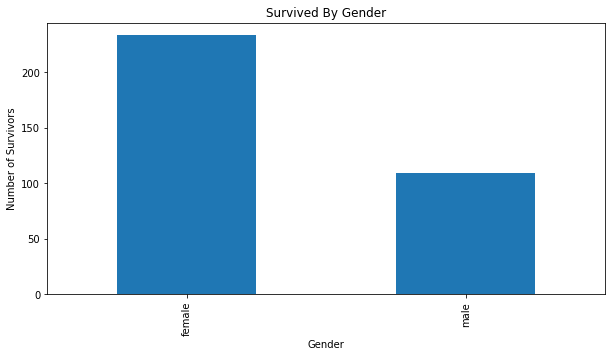

In [469]:
gender.plot(kind='bar',figsize=(10,5))
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.title('Survived By Gender')
plt.show()

Analysing the data we can infer females survived more than males, which is in line with history, we know females were given first preference in the evacuation of the ship.

In [470]:
df_died = df[df['Survived']==0] 

In [471]:
clas_died=df_died['Pclass'].value_counts()

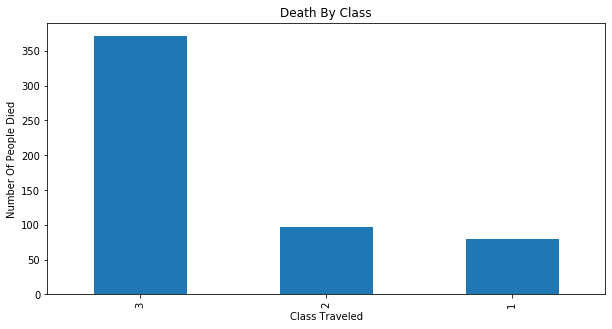

In [472]:
clas_died.plot(kind='bar',figsize=(10,5))
plt.xlabel('Class Traveled')
plt.ylabel('Number Of People Died')
plt.title('Death By Class')
plt.show()

We can infer that people who travelled in first class died less compared to people who traveled in 2nd and 3rd. We can see people who traveled in 2nd class died less compared to 3rd. This is also in line with historical data

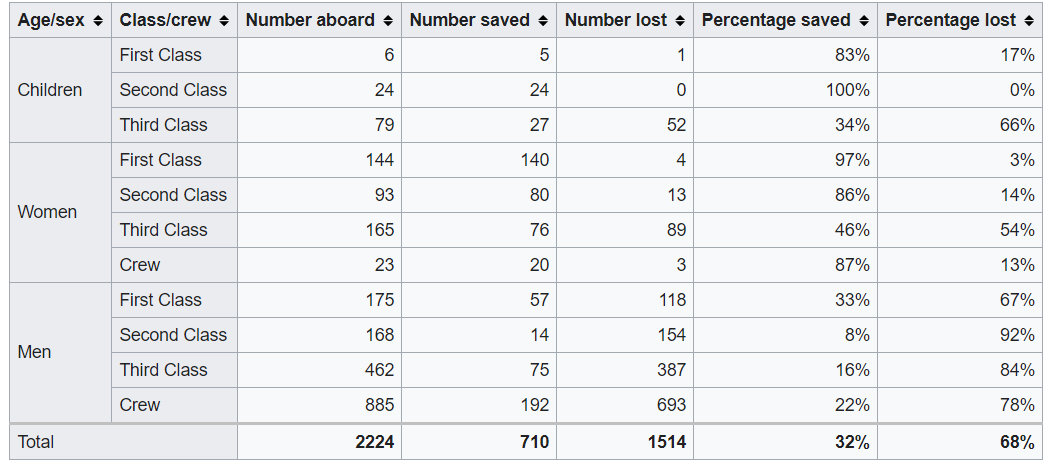

In [473]:
Image(filename='list.PNG')

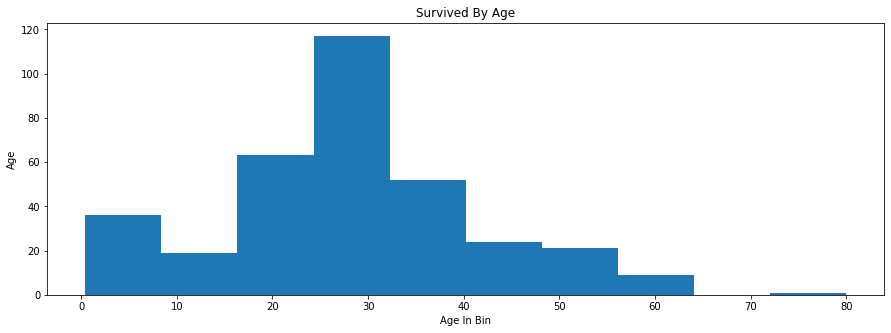

In [474]:
df_survived['Age'].plot(kind='hist',figsize=(15,5))
plt.xlabel('Age In Bin')
plt.ylabel('Age')
plt.title('Survived By Age')
plt.show()

In [475]:
df_survived['Age'].mean()

28.443479532163742

In [476]:
df_died['Age'].mean()

30.25591985428051

From the data we can infer if a person is younger then the chance of survival is high

In [477]:
df=df.drop(['Name','PassengerId','Cabin','Ticket'],axis=1) #droping unwanted columns

In [478]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Feature Engineering

Using one hot encoding on categorical columns to create dummy variables

In [479]:
df =pd.get_dummies(df,columns=['Pclass']) #Creating dummies for Pclass

In [480]:
df =pd.get_dummies(df,columns=['Sex']) #Creating dummies for Sex

In [481]:
df =pd.get_dummies(df,columns=['Embarked']) #Creating dummies for Embarked

In [482]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### Model Building 

I am using XGBoost classifier for the classification between Survival or not 

0 - Not Survived 
1 - Survived 

In [483]:
#importing XGB Classifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.metrics import classification_report, confusion_matrix

In [484]:
X=df.drop(['Survived'], axis=1) #Independent X

In [485]:
Y=df['Survived'] #Traget Y

In [486]:
#Splitting test and train dataset
seed = 2
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [487]:
model = XGBClassifier(learning_rate=0.2700000000000001)
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2700000000000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


### Accuracy Metrics

In this we evaluate the model using Accuracy score, Confusion matrix and Classification report

In [490]:
accuracy = accuracy_score(y_test, predictions)
accuracy=accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy))

Accuracy: 80.22%


In [493]:
print(confusion_matrix(y_test,predictions))

[[142  18]
 [ 35  73]]


#### Confusion matrix 

True Positives - 142; False Positive - 18; False Negative - 35; True Negative - 73

In [492]:
#Classifcation report helps us to kown the precision,recall and f1-socre of our lables which is calculated from confusion matrix 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       160
           1       0.80      0.68      0.73       108

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

